In [1]:
#import modules read in data, download data from "https://www.iposcoop.com/scoop-track-record-from-2000-to-present/"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
%matplotlib inline
# ipos = pd.read_csv(r'/Users/owy1/codefellows/401/machine-learning/lesson4/SCOOP-Rating-Performance.csv', encoding='latin1', names=['Trade Date', 'Issuer',
#    'Symbol', 'Lead Manager', 'Offer Price', 'Opening Price', '1st Day Close', '1st Day % Px Change', '$ Change Opening', '$ Change Close', 'Star Ratings', 'Performed'], skiprows=[134, 135, 242, 243, 401, 402, 691, 692, 923, 924, 1071,1072,1073,1217,1218,1379,1380,1442,1443,1491,1492,1749,1750,1988,1989,2216,2217,2450,2451,2532,2533,2616,2617,2712,2713], header=None)
ipos = pd.read_csv(r'/Users/owy1/codefellows/401/machine-learning/lesson4/SCOOP-Rating-Performance.csv', encoding='latin1', names=['Trade Date', 'Issuer',
   'Symbol', 'Lead Manager', 'Offer Price', 'Opening Price', '1st Day Close', '1st Day % Px Change', '$ Change Opening', '$ Change Close', 'Star Ratings', 'Performed'],sep='\t', header=None)
ipos=ipos.dropna(axis=0, how='all')
# ipos.iloc[135]
ipos


,Trade Date,Issuer,Symbol,Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Change,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,$10.00,$10.16,$10.25,2.50%,$0.16,$0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,$10.00,$10.10,$10.05,0.50%,$0.10,$0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,$19.00,$22.18,$21.65,13.95%,$3.18,$2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,$15.00,$16.00,$17.00,13.33%,$1.00,$2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,$15.00,$13.29,$11.65,-22.33%,($1.71),($3.35),2,Missed
5,1/27/17,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,$15.00,$14.18,$14.33,-4.47%,($0.82),($0.67),1,NaN
6,1/27/17,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,$23.00,$25.32,$26.12,13.57%,$2.32,$3.12,3,NaN
7,1/27/17,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,$16.00,$18.00,$17.25,7.81%,$2.00,$1.25,2,NaN
8,1/27/17,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,$22.00,$25.75,$25.00,13.64%,$3.75,$3.00,2,NaN
9,2/1/17,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,$20.00,$20.15,$20.00,0.00%,$0.15,$0.00,2,Missed


In [2]:
#clean up data, remove $%
ipos = ipos.applymap(lambda x: x if not '$' in str(x) else x. replace('$', ''))
ipos = ipos.applymap(lambda x: x if not '%' in str(x) else x. replace('%', ''))
ipos = ipos.applymap(lambda x: x if not ')' in str(x) else x. replace(')', ''))
ipos = ipos.applymap(lambda x: x if not '(' in str(x) else x. replace('(', '-'))
ipos

,Trade Date,Issuer,Symbol,Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Change,$ Change Opening,$ Change Close,Star Ratings,Performed
0,1/13/17,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN
1,1/20/17,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN
2,1/20/17,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN
3,1/26/17,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN
4,1/26/17,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed
5,1/27/17,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,1,NaN
6,1/27/17,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN
7,1/27/17,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN
8,1/27/17,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN
9,2/1/17,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed


In [3]:
#read in dataframe data type
ipos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 12 columns):
Trade Date             2916 non-null object
Issuer                 2916 non-null object
Symbol                 2916 non-null object
Lead Manager           2916 non-null object
Offer Price            2916 non-null object
Opening Price          2916 non-null object
1st Day Close          2916 non-null object
1st Day % Px Change    2916 non-null object
$ Change Opening       2916 non-null object
$ Change Close         2916 non-null object
Star Ratings           2916 non-null object
Performed              337 non-null object
dtypes: object(12)
memory usage: 296.2+ KB


In [4]:
#replace 'N/C' then change data type
ipos.replace('N/C', 0, inplace=True)
ipos.replace('No Call', 0, inplace=True)
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Change'] = ipos['1st Day % Px Change'].astype('float')
ipos['$ Change Opening'] = ipos['$ Change Opening'].astype('float')
ipos['$ Change Close'] = ipos['$ Change Close'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 120-11-01 00:00:00

In [5]:
ipos[ipos['Trade Date'] == '11/120']

,Trade Date,Issuer,Symbol,Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Change,$ Change Opening,$ Change Close,Star Ratings,Performed
1051,11/120,"Alon USA Partners, LP",ALDW,"Goldman, Sachs/ Credit Suisse/ Citigroup",16.00,17.00,18.40,15.00,1.00,2.40,1,NaN


In [8]:
ipos.loc[1051, 'Trade Date'] = '2012-11-20'
ipos.iloc[1051]

Trade Date                                           2012-11-20
Issuer                                   Alon USA Partners, LP 
Symbol                                                     ALDW
Lead Manager           Goldman, Sachs/ Credit Suisse/ Citigroup
Offer Price                                              16.00 
Opening Price                                            17.00 
1st Day Close                                            18.40 
1st Day % Px Change                                       15.00
$ Change Opening                                          1.00 
$ Change Close                                            2.40 
Star Ratings                                                  1
Performed                                                   NaN
Name: 1051, dtype: object

In [9]:
ipos['Trade Date'] = pd.to_datetime(ipos['Trade Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Change'] = ipos['1st Day % Px Change'].astype('float')
ipos['$ Change Opening'] = ipos['$ Change Opening'].astype('float')
ipos['$ Change Close'] = ipos['$ Change Close'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

ipos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 2915
Data columns (total 12 columns):
Trade Date             2916 non-null datetime64[ns]
Issuer                 2916 non-null object
Symbol                 2916 non-null object
Lead Manager           2916 non-null object
Offer Price            2916 non-null float64
Opening Price          2916 non-null float64
1st Day Close          2916 non-null float64
1st Day % Px Change    2916 non-null float64
$ Change Opening       2916 non-null float64
$ Change Close         2916 non-null float64
Star Ratings           2916 non-null int64
Performed              337 non-null object
dtypes: datetime64[ns](1), float64(6), int64(1), object(4)
memory usage: 376.2+ KB


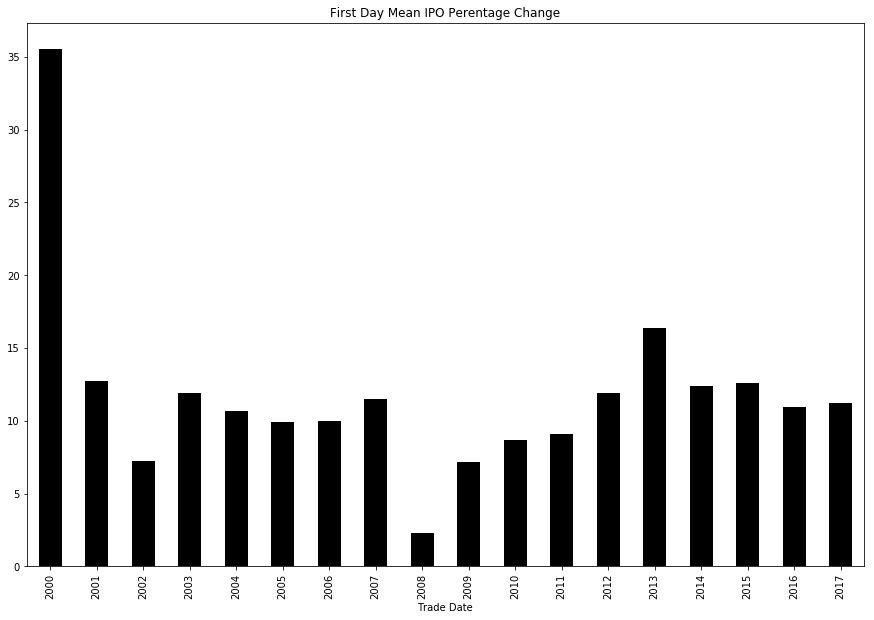

In [10]:
#plot the average of 1st day % Px Change against year
ipos.groupby(ipos['Trade Date'].dt.year)['1st Day % Px Change']\
.mean().plot(kind='bar', figsize=(15,10), color='k', title='First Day Mean IPO Perentage Change')

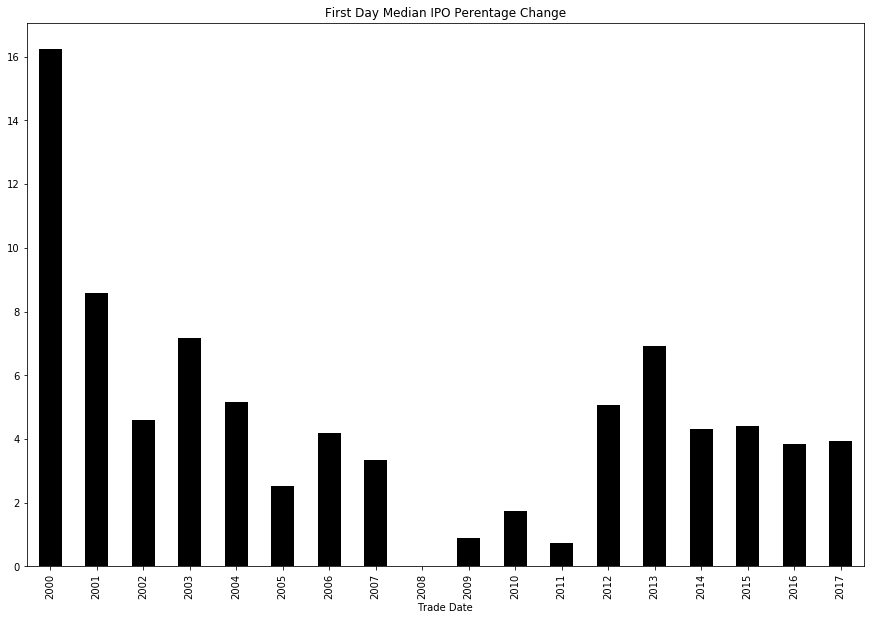

In [11]:
#plot the median of 1st day % Px Change against year
ipos.groupby(ipos['Trade Date'].dt.year)['1st Day % Px Change']\
.median().plot(kind='bar', figsize=(15,10), color='k', title='First Day Median IPO Perentage Change')


In [12]:
#since the median and mean plots look very different, this mean the distribution of returns are skewed by outliers
#we examine summary statistics of first day price change
ipos['1st Day % Px Change'].describe()

count    2916.000000
mean       13.085568
std        27.452345
min       -35.220000
25%         0.000000
50%         4.550000
75%        19.012500
max       353.850000
Name: 1st Day % Px Change, dtype: float64

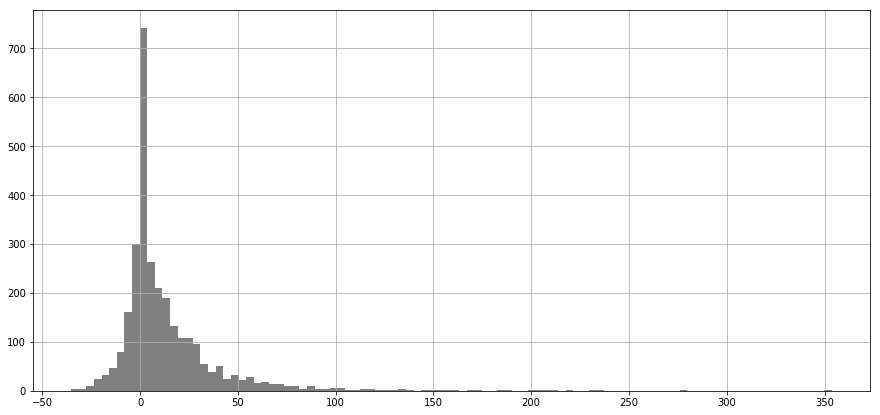

In [13]:
#histogram plot
ipos['1st Day % Px Change'].hist(figsize=(15,7), bins=100, color='grey')

In [14]:
#there are homeruns (the long tail to the right), but we have zero chance of getting the offering price.
#let's examine opening and closing price and see if there are opportunities to capture some return on the first day
ipos['$ Change Open to Close'] = ipos['$ Change Close']  - ipos['$ Change Opening']
ipos['% Change Open to Close'] = (ipos['$ Change Open to Close'] / ipos['Opening Price']) * 100
ipos

,Trade Date,Issuer,Symbol,Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Change,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-1.64,-12.340105
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,1,NaN,0.15,1.057828
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN,0.80,3.159558
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN,-0.75,-4.166667
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN,-0.75,-2.912621
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed,-0.15,-0.744417


In [15]:
ipos['% Change Open to Close'].describe()

count    2916.000000
mean        1.345705
std        10.917826
min       -98.522167
25%        -2.821365
50%         0.000000
75%         4.065041
max       159.417476
Name: % Change Open to Close, dtype: float64

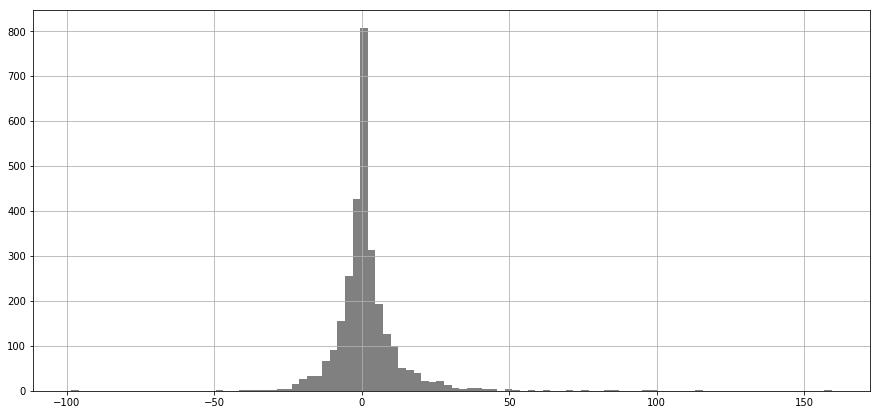

In [16]:
#this should generate a normal distribution
ipos['% Change Open to Close'].hist(figsize=(15,7), bins=100, color='grey')

In [ ]:
#strategy: purchase every IPO at its opening price and sell at close end of day
ipos[ipos['Trade Date']>='2017-01-01']['$ Change Open to Close'].describe()

In [ ]:
#winning trades
ipos[(ipos['Trade Date']>='2017-01-01')&(ipos['$ Change Open to Close']>0)]['$ Change Open to Close'].describe()

In [ ]:
#losing trades
ipos[(ipos['Trade Date']>='2017-01-01')&(ipos['$ Change Open to Close']<0)]['$ Change Open to Close'].describe()


In [17]:
#so the strategy of buying everything at opening and sell it at closing doesn't make money,
#with a mean percentage return < 0.3%, not good strategy.  Let's find out what variables affect
#performance of an offering as it begins trading - feature engineering
#download 'https://finance.yahoo.com/quote/%5EGSPC/history?period1=946886400&period2=1509865200&interval=1d&filter=history&frequency=1d'
sp = pd.read_csv(r'/Users/owy1/codefellows/401/machine-learning/lesson4/spy.csv')
sp['Date'] = pd.to_datetime(sp['Date'])
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
5,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
6,2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000
7,2000-01-12,1438.560059,1442.599976,1427.079956,1432.250000,1432.250000,974600000
8,2000-01-13,1432.250000,1454.199951,1432.250000,1449.680054,1449.680054,1030400000
9,2000-01-14,1449.680054,1473.000000,1449.680054,1465.150024,1465.150024,1085900000


In [18]:
def get_week_chg(ipo_dt):
    try:
        day_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]-1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]-8
        chg = (sp.iloc[day_ago_idx]['Close'] - \
              sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())

ipos['SP Week Change'] = ipos['Trade Date'].map(get_week_chg)

error 2015-02-21
error 2015-02-21
error 2013-11-16
error 2009-08-01


In [27]:
# ipos[ipos['Trade Date']=='2009-08-01'] #1379, EM
# ipos[ipos['Trade Date']=='2013-11-16'] #880, Wix.com
# ipos[ipos['Trade Date']=='2015-02-21'] #299, BZUN
# ipos[ipos['Trade Date']=='2015-02-21'] #300, CHCT


In [28]:
ipos.loc[1379, 'Trade Date'] = pd.to_datetime('2009-08-12')
ipos.loc[880, 'Trade Date'] = pd.to_datetime('2012-11-20')
ipos.loc[299, 'Trade Date'] = pd.to_datetime('2015-05-21')
ipos.loc[300, 'Trade Date'] = pd.to_datetime('2015-05-21')
ipos.iloc[1374]
ipos.iloc[875]
ipos.iloc[299]
ipos.iloc[300]
ipos['SP Week Change'] = ipos['Trade Date'].map(get_week_chg)

In [29]:
#add S&P 500 percentage change from previous day close to IPO next day opening 
def get_cto_chg(ipo_dt):
    try:
        today_open_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date']==str(ipo_dt.date())].index[0]-1
        chg = (sp.iloc[today_open_idx]['Open'] - \
              sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt)

ipos['SP Close to Open Chg Pct'] = ipos['Trade Date'].map(get_cto_chg)
ipos

,Trade Date,Issuer,Symbol,Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Change,$ Change Opening,$ Change Close,Star Ratings,Performed,$ Change Open to Close,% Change Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,1,NaN,0.09,0.885827,0.558495,0.101304
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,1,NaN,-0.05,-0.495050,-0.229625,0.276982
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,3,NaN,-0.53,-2.389540,-0.229625,0.276982
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,2,NaN,1.00,6.250000,1.043252,0.011302
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,2,Missed,-1.64,-12.340105,1.043252,0.011302
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,1,NaN,0.15,1.057828,1.269464,0.101890
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,3,NaN,0.80,3.159558,1.269464,0.101890
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,2,NaN,-0.75,-4.166667,1.269464,0.101890
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,2,NaN,-0.75,-2.912621,1.269464,0.101890
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,2,Missed,-0.15,-0.744417,0.332850,0.294882


In [33]:
#parse out lead manager by '/' then white space then print managers' names
ipos['Lead Mgr'] = ipos['Lead Manager'].map(lambda x: x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

# for n in pd.DataFrame (ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
#     print(n)

In [34]:
#clean list by consolidating manager names
ipos.loc[ipos['Lead Mgr'].str.contains('Hambracht'), 'Lead Mgr'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'), 'Lead Mgr'] = 'WR Hambrecht+Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'
ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'
ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'
ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'
ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'
ipos.loc[ipos['Lead Mgr'].str.contains('Maxium'), 'Lead Mgr'] = 'Maximum Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'
ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'
ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Bank of'), 'Lead Mgr'] = 'Banc of America'
ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'
ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('A Merrill Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O’Neil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O’Neil + Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'
ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'
ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'
ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('GS'), 'Lead Mgr'] = 'Goldman Sachs'
ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'
ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'
ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'
ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'
ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'
ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'
ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'
ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'
ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'
ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'
ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'
ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'
ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'
ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'
ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co'
ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'
ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'
ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'
ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'
ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'
ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'
ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'
ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'
ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('HCF'), 'Lead Mgr'] = 'HCFP Brenner'
ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr'] = 'Cohen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'
ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr'] = 'Leerink Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Merrill'), 'Lead Mgr'] = 'Merrill Lynch'
ipos.loc[ipos['Lead Mgr'].str.contains('Gunnar'), 'Lead Mgr'] = 'Joseph Gunnar'
ipos.loc[ipos['Lead Mgr'].str.contains('Dawson'), 'Lead Mgr'] = 'Dawson James Securities'
ipos.loc[ipos['Lead Mgr'].str.contains('Macquarie'), 'Lead Mgr'] = 'Macquarie Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('ViewTrade'), 'Lead Mgr'] = 'ViewTrade Securities'
ipos.loc[ipos['Lead Mgr'].str.contains('Craig'), 'Lead Mgr'] = 'Craig-Hallum Capital Group'
ipos.loc[ipos['Lead Mgr'].str.contains('Northland'), 'Lead Mgr'] = 'Northland Capital Markets'
ipos.loc[ipos['Lead Mgr'].str.contains('Axiom'), 'Lead Mgr'] = 'Axiom Capital Management'
ipos.loc[ipos['Lead Mgr'].str.contains('WallachBeth'), 'Lead Mgr'] = 'WallachBeth Capital'
ipos.loc[ipos['Lead Mgr'].str.contains('Weisel'), 'Lead Mgr'] = 'Thomas Weisel Partners'
ipos.loc[ipos['Lead Mgr'].str.contains('Stephens'), 'Lead Mgr'] = 'Robertson Stephens'
ipos.loc[ipos['Lead Mgr'].str.contains('Needham'), 'Lead Mgr'] = 'Needham & Company'
ipos.loc[ipos['Lead Mgr'].str.contains('Donaldson'), 'Lead Mgr'] = 'Donaldson, Lufkin & Jenrette'
ipos.loc[ipos['Lead Mgr'].str.contains('DLJ'), 'Lead Mgr'] = 'Donaldson, Lufkin & Jenrette'
ipos.loc[ipos['Lead Mgr'].str.contains('Unterberg'), 'Lead Mgr'] = 'C.E. Unterberg, Towbin'
ipos.loc[ipos['Lead Mgr'].str.contains('MDB Capital'), 'Lead Mgr'] = 'MDB Capital Group, LLC'
ipos.loc[ipos['Lead Mgr'].str.contains('UBS '), 'Lead Mgr'] = 'UBS'

for n in pd.DataFrame (ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(n)

AG Edwards
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BBVA
BMN Nesbitt Burns
BMO Capital Markets
Banc of America
Barclays
Bear Stearns
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
Chase H&Q
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital Group
DA Davidson
DBAB
Dain Rauscher Wessels
Dawson James Securities
Deutsche Bank
Donald
Donaldson, Lufkin & Jenrette
Dougherty & Company
EarlyBirdCapital
Equity Securities
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
First Van Kasper
Friedman Billings Ramsey
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs
Gunn Allen
HCFP Brenner
I-Bankers
ING Barings
Imperial Capital
JMP Securities
JP Morgan
JP Turner
Janney Montgomery Scott
Jefferies
Johnson Rice
Keefe, Bruyette & Woods
KeyB

In [35]:
#add underwriter count, date features, change between offering and opening 
ipos['Total Underwriters'] = ipos['Lead Manager'].map(lambda x: len(x.split('/')))
ipos['Week Day'] = ipos['Trade Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed', 3:'Thurs',\
                                                 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Trade Date'].map(lambda x: x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June',\
                                   7:'July', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

ipos['Gap Open Pct'] = (ipos['$ Change Opening'].astype('float')/ipos['Opening Price'].astype('float'))*100
ipos['Open to Close Pct'] = (ipos['$ Change Close'].astype('float')-ipos['$ Change Opening'].astype('float'))/\
ipos['Opening Price'].astype('float')*100
ipos

,Trade Date,Issuer,Symbol,Lead Manager,Offer Price,Opening Price,1st Day Close,1st Day % Px Change,$ Change Opening,$ Change Close,...,$ Change Open to Close,% Change Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2017-01-13,Gores Holdings II,GSHTU,Deutsche Bank Securities,10.00,10.16,10.25,2.50,0.16,0.25,...,0.09,0.885827,0.558495,0.101304,Deutsche Bank,1,Fri,Jan,1.574803,0.885827
1,2017-01-20,FinTech Acquisition Corp. II,FNTEU,Cantor Fitzgerald & Co.,10.00,10.10,10.05,0.50,0.10,0.05,...,-0.05,-0.495050,-0.229625,0.276982,Cantor Fitzgerald,1,Fri,Jan,0.990099,-0.495050
2,2017-01-20,Keane Group,FRAC,Citigroup/ Morgan Stanley/ BofA Merrill Lynch/...,19.00,22.18,21.65,13.95,3.18,2.65,...,-0.53,-2.389540,-0.229625,0.276982,Citigroup,4,Fri,Jan,14.337241,-2.389540
3,2017-01-26,AnaptysBio,ANAB,Credit Suisse/ Stifel,15.00,16.00,17.00,13.33,1.00,2.00,...,1.00,6.250000,1.043252,0.011302,CSFB,2,Thurs,Jan,6.250000,6.250000
4,2017-01-26,ObsEva SA,OBSV,Credit Suisse/ Jefferies/ Leerink Partners,15.00,13.29,11.65,-22.33,-1.71,-3.35,...,-1.64,-12.340105,1.043252,0.011302,CSFB,3,Thurs,Jan,-12.866817,-12.340105
5,2017-01-27,Jagged Peak Energy,JAG,Citigroup/ Credit Suisse/ J.P. Morgan,15.00,14.18,14.33,-4.47,-0.82,-0.67,...,0.15,1.057828,1.269464,0.101890,Citigroup,3,Fri,Jan,-5.782793,1.057828
6,2017-01-27,JELD-WEN Holding,JELD,Barclays/ Citigroup/ Credit Suisse/ J.P. Morgan,23.00,25.32,26.12,13.57,2.32,3.12,...,0.80,3.159558,1.269464,0.101890,Barclays,4,Fri,Jan,9.162717,3.159558
7,2017-01-27,Jounce Therapeutics,JNCE,J.P. Morgan/ Cowen and Company,16.00,18.00,17.25,7.81,2.00,1.25,...,-0.75,-4.166667,1.269464,0.101890,JP Morgan,2,Fri,Jan,11.111111,-4.166667
8,2017-01-27,REV Group,REVG,Goldman Sachs/ Morgan Stanley/ Baird,22.00,25.75,25.00,13.64,3.75,3.00,...,-0.75,-2.912621,1.269464,0.101890,Goldman Sachs,3,Fri,Jan,14.563107,-2.912621
9,2017-02-01,Invitation Homes,INVH,Deutsche Bank Securities/ J.P. Morgan/ BofA Me...,20.00,20.15,20.00,0.00,0.15,0.00,...,-0.15,-0.744417,0.332850,0.294882,Deutsche Bank,8,Wed,Feb,0.744417,-0.744417


In [36]:
#use Patsy library to transform data to statistical matrix
from patsy import dmatrix
X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") +\
Q("$ Change Opening") + Q("Lead Manager") + Q("Offer Price") +Q("Opening Price") +\
Q("SP Close to Open Chg Pct") +Q("SP Week Change")', data=ipos, return_type='dataframe')
X

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.July],Month[T.June],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Manager"")[T.Wunderlich Securities/ Oppenheimer/ Janney Montgomery Scott/ JMP Securities/ BB&T Capital Markets]","Q(""Lead Manager"")[T.Wunderlich/ Craig-Hallum Capital Group]","Q(""Lead Manager"")[T.Wunderlich/Ladenburg Thalmann]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Change Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.574803,0.16,10.00,10.16,0.101304,0.558495
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.990099,0.10,10.00,10.10,0.276982,-0.229625
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,14.337241,3.18,19.00,22.18,0.276982,-0.229625
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.250000,1.00,15.00,16.00,0.011302,1.043252
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,-12.866817,-1.71,15.00,13.29,0.011302,1.043252
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,-5.782793,-0.82,15.00,14.18,0.101890,1.269464
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,9.162717,2.32,23.00,25.32,0.101890,1.269464
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,11.111111,2.00,16.00,18.00,0.101890,1.269464
8,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,14.563107,3.75,22.00,25.75,0.101890,1.269464
9,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,0.744417,0.15,20.00,20.15,0.294882,0.332850


In [37]:
#binary classification - predict whether we should BUY IPO or NOT
#first 2017 trade date index 0
X_train, X_test = X[134:], X[:133]
y_train = ipos['$ Change Open to Close'][134:].map(lambda x: 1 if x>=1 else 0)
y_test = ipos['$ Change Open to Close'][:133].map(lambda x: 1 if x>=1 else 0)

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
clf.score(X_test, y_test)

0.81954887218045114

In [39]:
ipos[(ipos['Trade Date']>='2017-01-01')]['$ Change Open to Close'].describe()

count    134.000000
mean       0.255075
std        1.658623
min       -3.200000
25%       -0.300000
50%        0.015000
75%        0.687500
max        7.720000
Name: $ Change Open to Close, dtype: float64

In [45]:
pred_label = clf.predict(X_test)
results = []
for p1, t1, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Change Open to Close']):
    if p1 == t1:
        results.append([idx, chg, p1, t1, 1])
    else:
        results.append([idx, chg, p1, t1, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()
# rf

# fig, ax = plt.subplots(figsize=(15,10))
# rf[rf['predicted']==1]['$ chg'].plot(kind='bar')
# ax.set_title('Model Predicted Buys', y=1.01)
# ax.set_ylabel('$ Change Open to Close')
# ax.set_xlabel('index')

count    1.00
mean     1.78
std       NaN
min      1.78
25%      1.78
50%      1.78
75%      1.78
max      1.78
Name: $ chg, dtype: float64

In [50]:
X_train, X_test = X[134:], X[:133]
y_train = ipos['$ Change Open to Close'][134:].map(lambda x: 1 if x>0.25 else 0)
y_test = ipos['$ Change Open to Close'][:133].map(lambda x: 1 if x>0.25 else 0)

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.68421052631578949

In [49]:
pred_label = clf.predict(X_test)
results = []
for p1, t1, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Change Open to Close']):
    if p1 == t1:
        results.append([idx, chg, p1, t1, 1])
    else:
        results.append([idx, chg, p1, t1, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()
# rf

count    8.000000
mean     0.237500
std      1.696423
min     -1.920000
25%     -1.502500
50%      0.635000
75%      1.785000
max      2.140000
Name: $ chg, dtype: float64

In [53]:
X_train, X_test = X[240:], X[:239]
y_train = ipos['$ Change Open to Close'][240:].map(lambda x: 1 if x>0.25 else 0)
y_test = ipos['$ Change Open to Close'][:239].map(lambda x: 1 if x>0.25 else 0)

clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.70711297071129708

In [54]:
pred_label = clf.predict(X_test)
results = []
for p1, t1, idx, chg in zip(pred_label, y_test, y_test.index, ipos.ix[y_test.index]['$ Change Open to Close']):
    if p1 == t1:
        results.append([idx, chg, p1, t1, 1])
    else:
        results.append([idx, chg, p1, t1, 0])
rf = pd.DataFrame(results, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf[rf['predicted']==1]['$ chg'].describe()

count    24.000000
mean      0.472500
std       2.759532
min      -2.390000
25%      -1.292500
50%      -0.155000
75%       1.457500
max      10.500000
Name: $ chg, dtype: float64

In [55]:
# retrieve model coefficients to access probability of positive outcome
fv = pd.DataFrame(X_train.columns, clf.coef_.T).reset_index()
fv.columns = ['Coef', 'Feature']
fv.sort_values('Coef', ascending=0).reset_index(drop=True)

,Coef,Feature
0,1.630753,"Q(""Lead Manager"")[T.Merrill Lynch/Morgan Stanley]"
1,1.396667,"Q(""Lead Manager"")[T.Robertson Stephens]"
2,1.146098,"Q(""Lead Manager"")[T.Credit Suisse/UBS Investme..."
3,1.062050,"Q(""Lead Manager"")[T.Lehman Brothers/JPMorgan]"
4,1.059284,"Q(""Lead Manager"")[T.Deutsche Banc Alex Brown]"
5,1.047583,"Q(""Lead Manager"")[T.JPMorgan/Piper Jaffray]"
6,1.043330,"Q(""Lead Manager"")[T.Credit Suisse/Merrill Lynch]"
7,1.008646,"Q(""Lead Manager"")[T.Lehman Brothers/UBS Invest..."
8,0.970102,"Q(""Lead Manager"")[T.William Blair/ Baird/ Raym..."
9,0.969166,"Q(""Lead Manager"")[T.JPMorgan/Deutsche Bank]"


In [56]:
fv[fv['Feature'].str.contains('Week Day')]

,Coef,Feature
12,-0.295393,"Q(""Week Day"")[T.Mon]"
13,-0.006533,"Q(""Week Day"")[T.Thurs]"
14,-0.160384,"Q(""Week Day"")[T.Tues]"
15,-0.153297,"Q(""Week Day"")[T.Wed]"


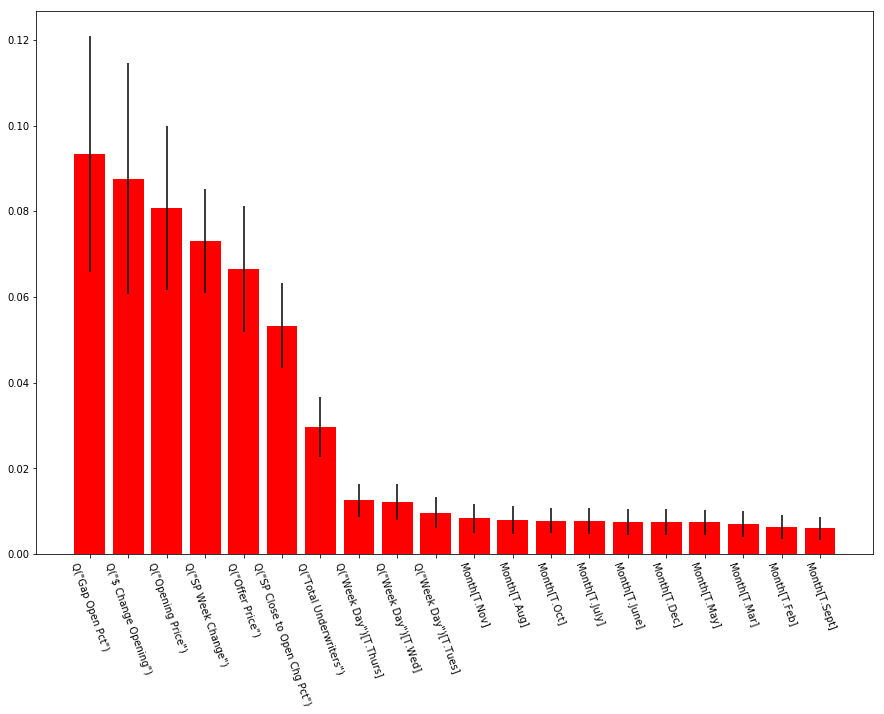

In [57]:
#Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=1000)
clf_rf.fit(X_train, y_train)
f_importances = clf_rf.feature_importances_
f_names = X_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)
imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]
plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="r", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);